In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('Data/labels.csv')

In [3]:
df2=pd.read_csv('Data/values.csv')

In [4]:
df =pd.merge(df2,df1)

In [5]:
df.head(5)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [6]:
df.tail(5)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,0


In [7]:
df.shape

(180, 15)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
slope_of_peak_exercise_st_segment,180.0,1.550000,0.618838,1.0,1.00,1.0,2.00,3.0
resting_blood_pressure,180.0,131.311111,17.010443,94.0,120.00,130.0,140.00,180.0
chest_pain_type,180.0,3.155556,0.938454,1.0,3.00,3.0,4.00,4.0
num_major_vessels,180.0,0.694444,0.969347,0.0,0.00,0.0,1.00,3.0
fasting_blood_sugar_gt_120_mg_per_dl,180.0,0.161111,0.368659,0.0,0.00,0.0,0.00,1.0
resting_ekg_results,180.0,1.050000,0.998742,0.0,0.00,2.0,2.00,2.0
serum_cholesterol_mg_per_dl,180.0,249.211111,52.717969,126.0,213.75,245.5,281.25,564.0
oldpeak_eq_st_depression,180.0,1.010000,1.121357,0.0,0.00,0.8,1.60,6.2
sex,180.0,0.688889,0.464239,0.0,0.00,1.0,1.00,1.0
age,180.0,54.811111,9.334737,29.0,48.00,55.0,62.00,77.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [10]:
df.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [11]:
df.heart_disease_present.value_counts()

0    100
1     80
Name: heart_disease_present, dtype: int64

## eda

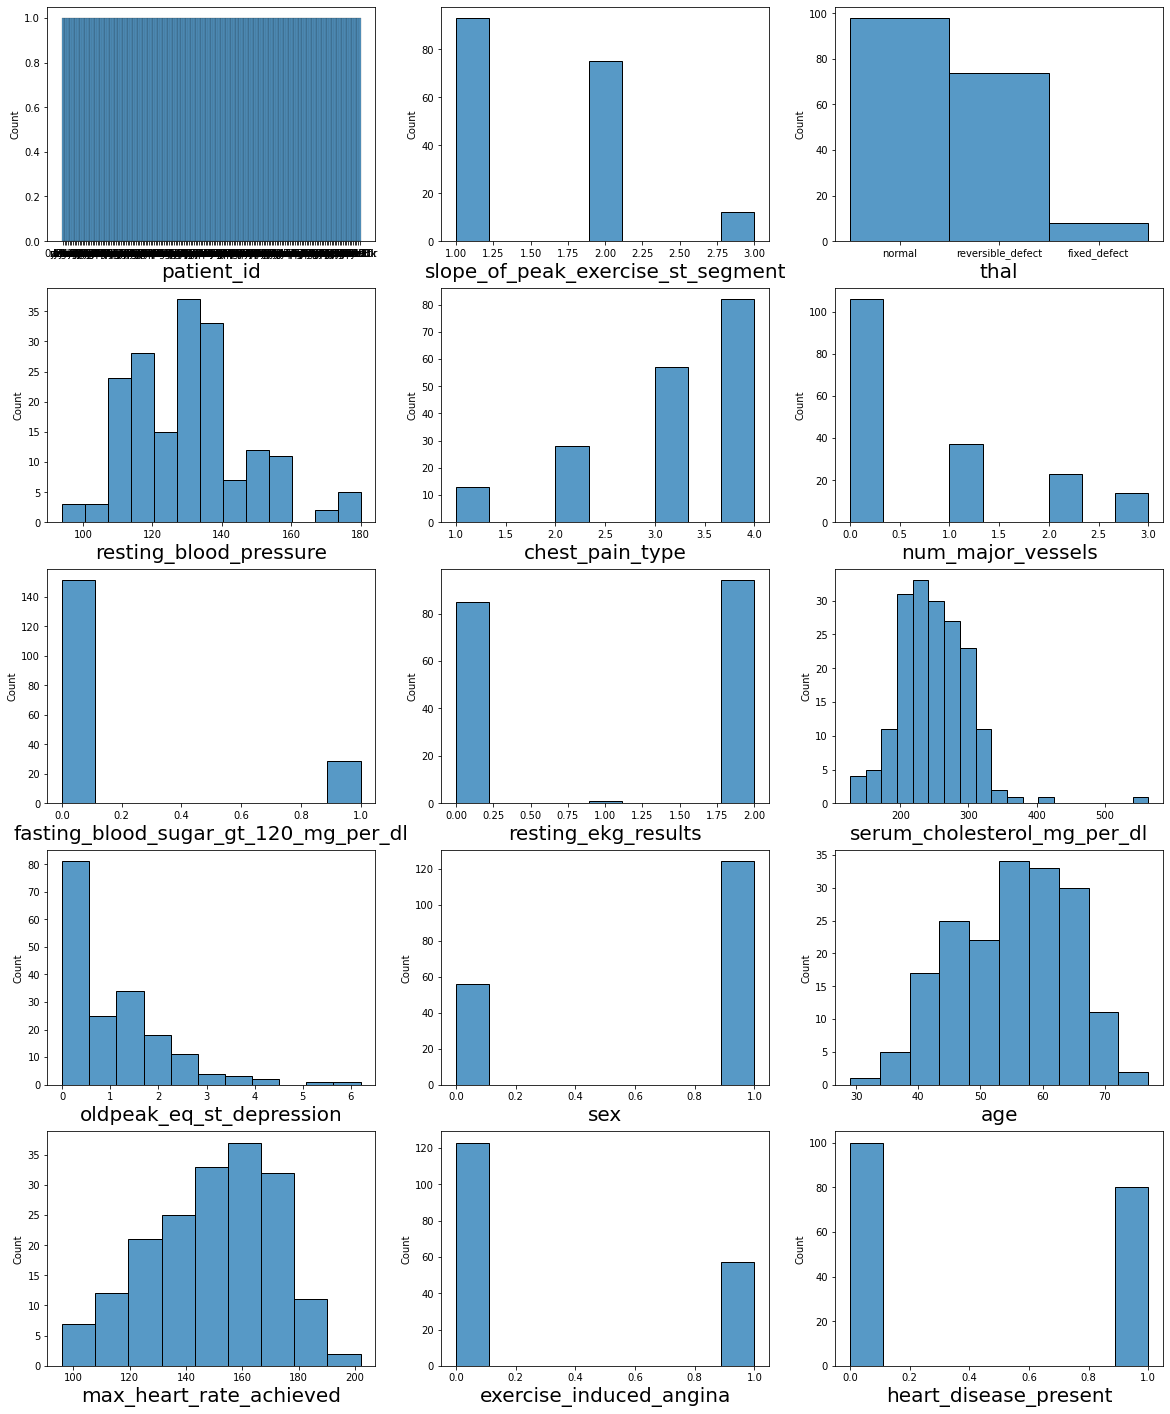

In [12]:
plt.figure(figsize=(20,25), facecolor='white')# defining  canvas size
plotnumber = 1 # initializing plotnumber variable to 1 it will maintain the count of how many graph is going to plot in canvas 


for column in df.columns: # iteration of columns / acessing the columns from  dataset 
    if plotnumber<=15 :     # as there are 9 columns in the data
        ax = plt.subplot(5,3,plotnumber)# plotting 9 graphs (3-rows,3-columns) ,plotnumber is for count  
        sns.histplot(x=df[column]) ## it give frequency hue =value counts
        plt.xlabel(column,fontsize=20) #assigning name to x-axis and "name" font size is 20
        
    plotnumber+=1 # increment of plotnumber 
plt.show()# to show graph

In [13]:
for column in df.columns:#for loop to acess columns form dataset
    if df[column].dtype == object and len(df[column].unique()) <= 180:#checking datatype whether datatype is object/string and number of unique label in the columns less than 50 
        df1=df[column]
        
        

In [14]:
df1=pd.DataFrame(df1)

In [15]:
df1#categorical column

,thal
0,normal
1,normal
2,normal
3,reversible_defect
4,reversible_defect
...,...
175,reversible_defect
176,normal
177,reversible_defect
178,normal


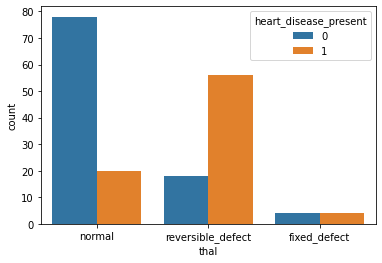

In [16]:
sns.countplot(x='thal',hue='heart_disease_present', data=df)
plt.show()

In [17]:
df2 = df[[x for x in df.columns if x not in ['patient_id', 'thal','heart_disease_present']]]

In [18]:
df2# numerical column

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,128,2,0,0,2,308,0.0,1,45,170,0
1,2,110,3,0,0,0,214,1.6,0,54,158,0
2,1,125,4,3,0,2,304,0.0,1,77,162,1
3,1,152,4,0,0,0,223,0.0,1,40,181,0
4,3,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,125,4,2,1,0,254,0.2,1,67,163,0
176,2,180,4,0,0,1,327,3.4,0,55,117,1
177,2,125,3,0,0,0,309,1.8,1,64,131,1
178,1,124,3,2,1,0,255,0.0,1,48,175,0


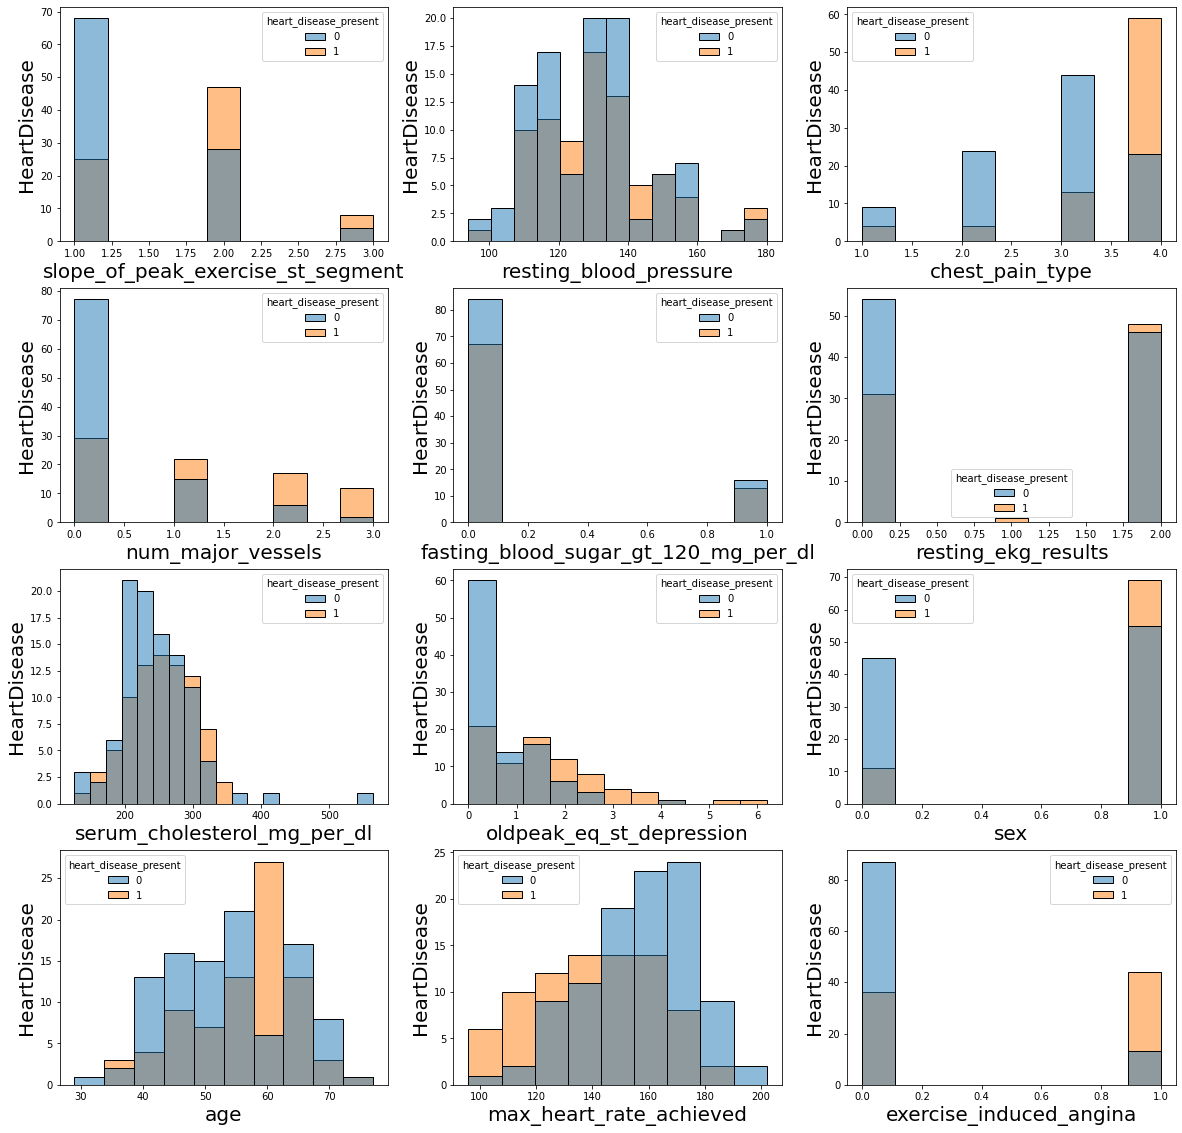

In [19]:
plt.figure(figsize=(20,25), facecolor='white')# defining  canvas size
plotnumber = 1 # initializing plotnumber variable to 1 it will maintain the count of how many graph is going to plot in canvas 


for column in df2.columns: # iteration of columns / acessing the columns from  dataset 
    if plotnumber<=15 :     # as there are 9 columns in the data
        ax = plt.subplot(5,3,plotnumber)# plotting 9 graphs (3-rows,3-columns) ,plotnumber is for count  
        sns.histplot(x=df2[column],hue=df.heart_disease_present) ## it give frequency hue =value counts
        plt.xlabel(column,fontsize=20) #assigning name to x-axis and "name" font size is 20
        plt.ylabel('HeartDisease',fontsize=20)#assigning name to y-axis and "name" font size is 20
    plotnumber+=1 # increment of plotnumber 
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
lb=LabelEncoder()
df.thal=lb.fit_transform(df['thal'])

In [22]:
df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0


In [23]:
df.max_heart_rate_achieved.value_counts()

162    10
142     6
132     6
152     5
125     5
       ..
133     1
134     1
137     1
141     1
202     1
Name: max_heart_rate_achieved, Length: 73, dtype: int64

In [24]:
df3 = df[['resting_blood_pressure','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','max_heart_rate_achieved','age',]]

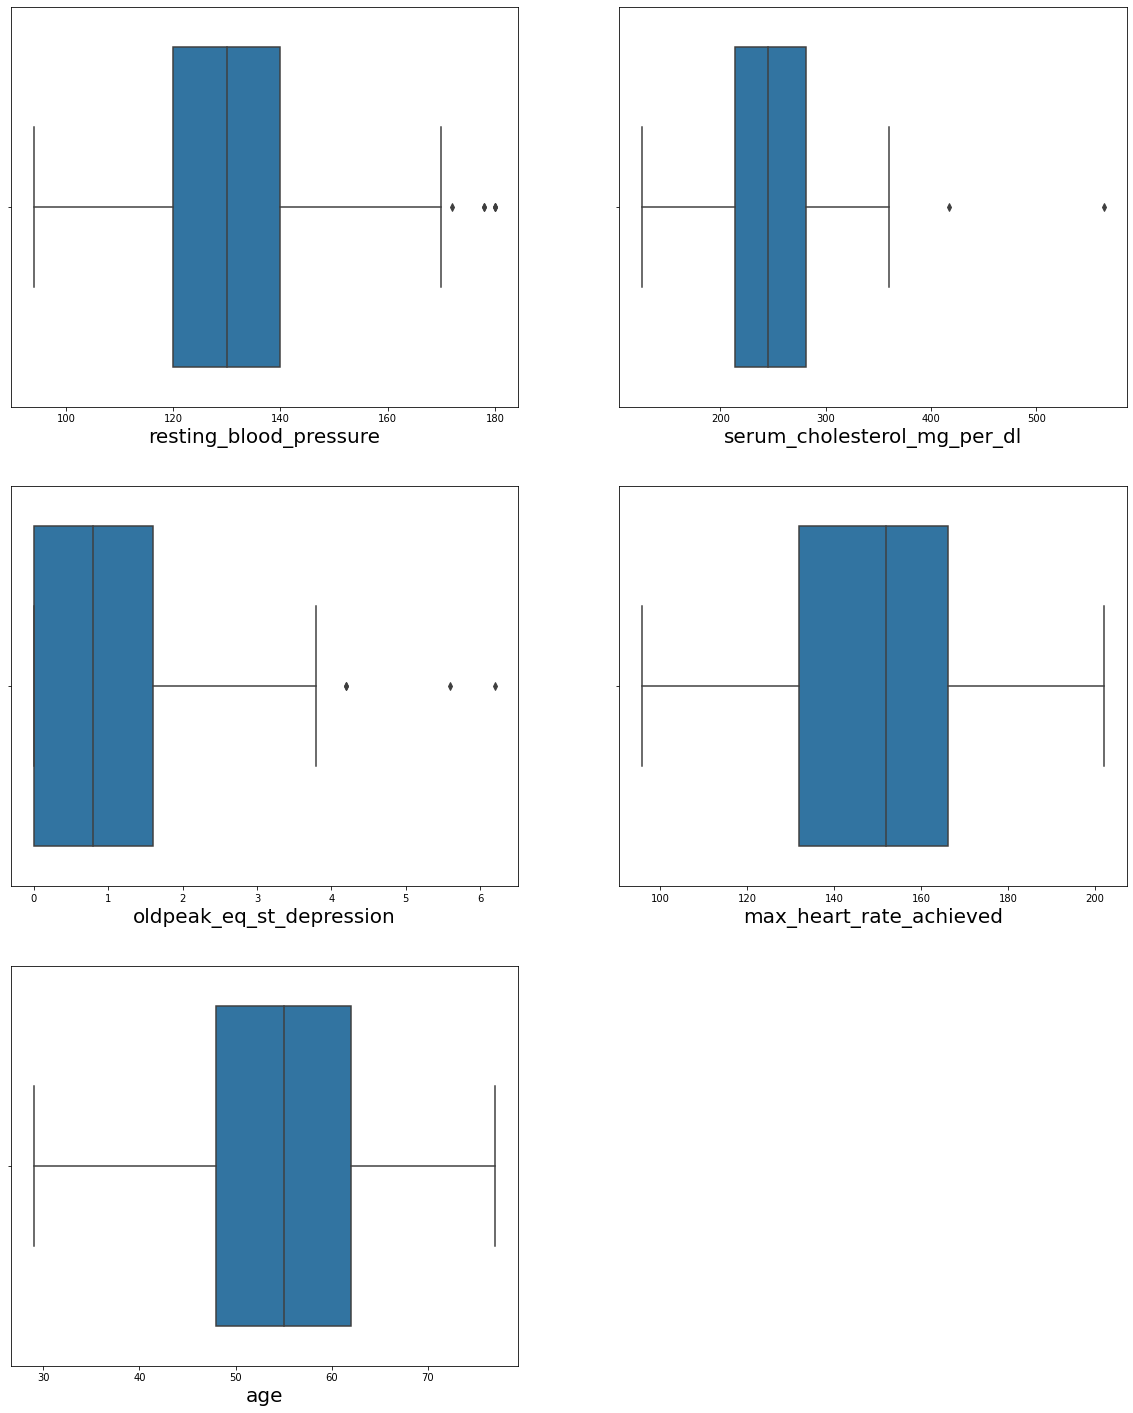

In [25]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1#counter

for column in df3:#columns form data1
    if plotnumber<=6 :#checking whether plot number is less or equal to 6
        ax = plt.subplot(3,2,plotnumber)# 
        sns.boxplot(column,data=df3)# ploting boxplot fo outlier 
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
slope_of_peak_exercise_st_segment,180.0,1.550000,0.618838,1.0,1.00,1.0,2.00,3.0
thal,180.0,1.366667,0.568247,0.0,1.00,1.0,2.00,2.0
resting_blood_pressure,180.0,131.311111,17.010443,94.0,120.00,130.0,140.00,180.0
chest_pain_type,180.0,3.155556,0.938454,1.0,3.00,3.0,4.00,4.0
num_major_vessels,180.0,0.694444,0.969347,0.0,0.00,0.0,1.00,3.0
fasting_blood_sugar_gt_120_mg_per_dl,180.0,0.161111,0.368659,0.0,0.00,0.0,0.00,1.0
resting_ekg_results,180.0,1.050000,0.998742,0.0,0.00,2.0,2.00,2.0
serum_cholesterol_mg_per_dl,180.0,249.211111,52.717969,126.0,213.75,245.5,281.25,564.0
oldpeak_eq_st_depression,180.0,1.010000,1.121357,0.0,0.00,0.8,1.60,6.2
sex,180.0,0.688889,0.464239,0.0,0.00,1.0,1.00,1.0


In [27]:
upper_limit = df.resting_blood_pressure.mean() + 3*df.resting_blood_pressure.std()
upper_limit

182.3424411745603

In [28]:
lower_limit = df.resting_blood_pressure.mean() -3*df.resting_blood_pressure.std()
lower_limit

80.27978104766191

In [29]:
len(df.loc[df['oldpeak_eq_st_depression'] > upper_limit])

0

In [30]:
df.shape[0]

180

In [31]:
#since outliers are less tan 5% we dont want to handle them

<AxesSubplot:>

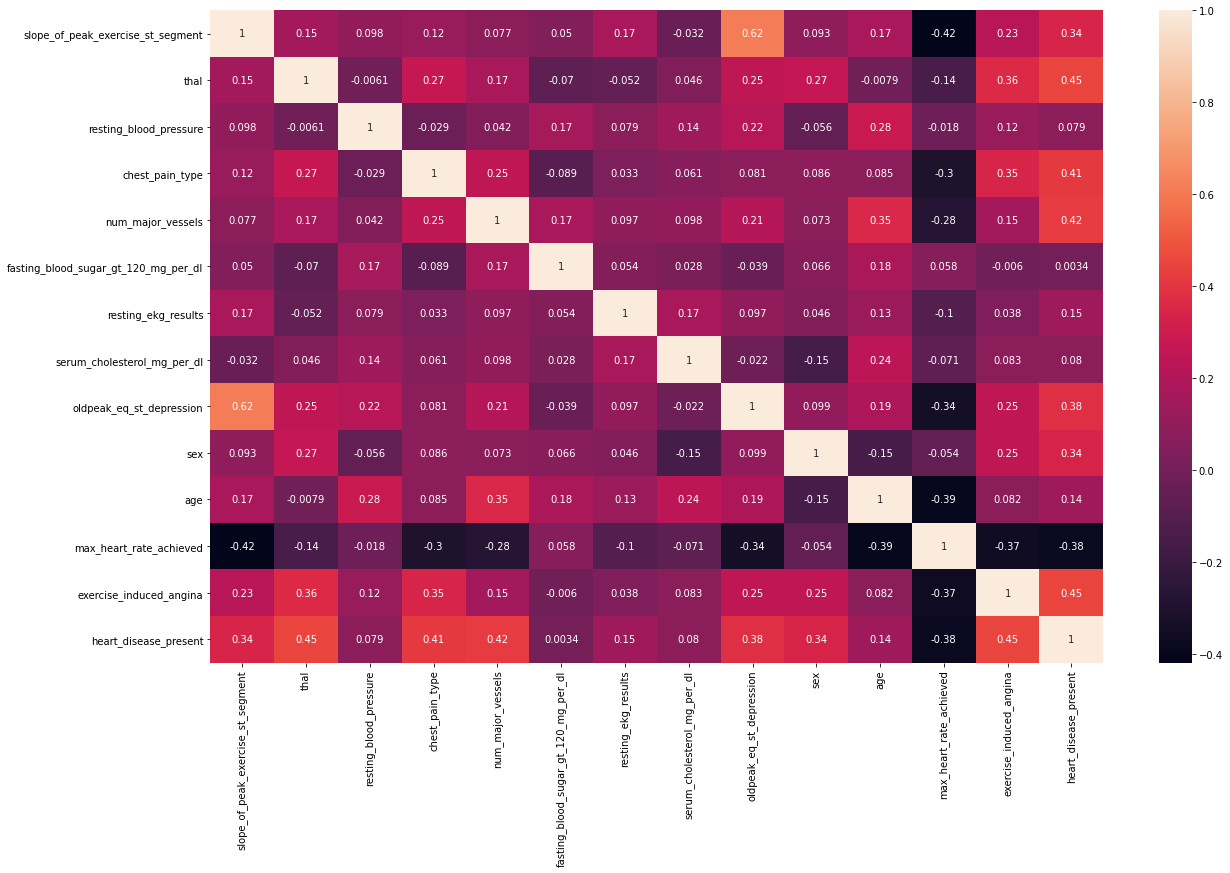

In [32]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True)

## model building

In [33]:
df.drop(columns = ['patient_id'], inplace = True)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = df[df.columns[:-1]]
y = df.heart_disease_present

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=1)

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [37]:
class Model:
    scores = {'Model':[], 'Accuracy':[], 'CV_Score':[]}
    
    def __init__(self, model, model_name):
        self.model = model
        self.model_name = model_name
        
        
    def predict(self):
        self.model.fit(train_x, train_y)
        pred = self.model.predict(test_x)
        cv_score = np.mean(cross_val_score(self.model, test_x, test_y, cv=5))
        
        self.performance(pred, cv_score)
    
    def performance(self, pred, cv_score):
        accuracy = accuracy_score(pred, test_y)
        
        Model.scores['Model'].append(self.model_name)
        Model.scores['Accuracy'].append(accuracy)
        Model.scores['CV_Score'].append(cv_score)
        
        print(f'Accuracy Score: {accuracy}')
        print(f'Mean Cross Validation Score: {cv_score}\n')
        print(f'Classification Report\n{classification_report(pred, test_y)}')
        
        self.confusion_matrix(pred)
        
    def confusion_matrix(self, pred):
        cm = confusion_matrix(test_y, pred)
        return sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")

### KNN

Accuracy Score: 0.5777777777777777
Mean Cross Validation Score: 0.6222222222222222

Classification Report
              precision    recall  f1-score   support

           0       0.64      0.62      0.63        26
           1       0.50      0.53      0.51        19

    accuracy                           0.58        45
   macro avg       0.57      0.57      0.57        45
weighted avg       0.58      0.58      0.58        45



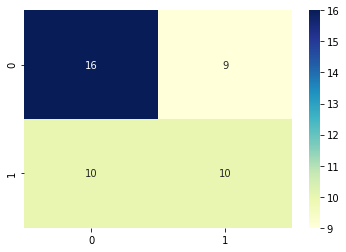

In [38]:
from sklearn.neighbors import KNeighborsClassifier

model = Model(KNeighborsClassifier(), 'KNN')
model.predict()

### Decision Tree Classifier

Accuracy Score: 0.6222222222222222
Mean Cross Validation Score: 0.5111111111111111

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.64      0.68        28
           1       0.50      0.59      0.54        17

    accuracy                           0.62        45
   macro avg       0.61      0.62      0.61        45
weighted avg       0.64      0.62      0.63        45



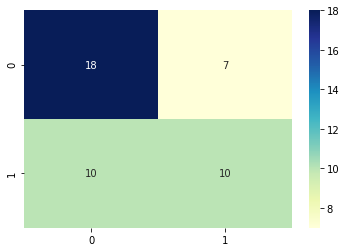

In [39]:
from sklearn.tree import DecisionTreeClassifier

model = Model(DecisionTreeClassifier(), 'Decision Tree')
model.predict()

### Naive Bayesian

Accuracy Score: 0.7555555555555555
Mean Cross Validation Score: 0.6666666666666666

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.77      0.78        26
           1       0.70      0.74      0.72        19

    accuracy                           0.76        45
   macro avg       0.75      0.75      0.75        45
weighted avg       0.76      0.76      0.76        45



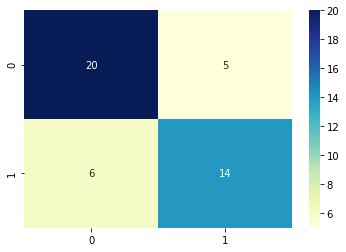

In [40]:
from sklearn.naive_bayes import GaussianNB

model = Model(GaussianNB(), 'Gaussian NB')
model.predict()

### Logistic Regression

Accuracy Score: 0.7111111111111111
Mean Cross Validation Score: 0.7555555555555555

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.75      0.73        24
           1       0.70      0.67      0.68        21

    accuracy                           0.71        45
   macro avg       0.71      0.71      0.71        45
weighted avg       0.71      0.71      0.71        45



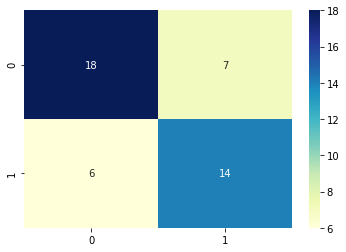

In [41]:
from sklearn.linear_model import LogisticRegression

model = Model(LogisticRegression(), 'Logistic Regression')
model.predict()

### Support Vector Machine

Accuracy Score: 0.6444444444444445
Mean Cross Validation Score: 0.5555555555555556

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.62      0.75        39
           1       0.25      0.83      0.38         6

    accuracy                           0.64        45
   macro avg       0.60      0.72      0.57        45
weighted avg       0.87      0.64      0.70        45



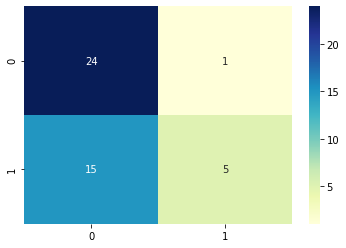

In [42]:
from sklearn.svm import SVC

model = Model(SVC(), 'SVC')
model.predict()

### Model Evaluation

In [43]:
performance_df_ = pd.DataFrame(Model.scores)
performance_df_.sort_values(by='Accuracy', ascending=False, inplace=True)
performance_df_.reset_index(drop = True, inplace = True)

performance_df_['Scaling'] = False

# Scaled Features

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_train_x = scaler.fit_transform(train_x)
scaled_test_x = scaler.fit_transform(test_x)

In [45]:
class Model:
    scores = {'Model':[], 'Accuracy':[], 'CV_Score':[]}
    
    def __init__(self, model, model_name):
        self.model = model
        self.model_name = model_name
        
    def predict(self):
        self.model.fit(scaled_train_x, train_y)
        pred = self.model.predict(scaled_test_x)
        cv_score = np.mean(cross_val_score(self.model, scaled_test_x, test_y, cv=5))
        
        self.performance(pred, cv_score)
    
    def performance(self, pred, cv_score):
        accuracy = accuracy_score(pred, test_y)
        
        Model.scores['Model'].append(self.model_name)
        Model.scores['Accuracy'].append(accuracy)
        Model.scores['CV_Score'].append(cv_score)
        
        print(f'Accuracy Score: {accuracy}')
        print(f'Mean Cross Validation Score: {cv_score}\n')
        print(f'Classification Report\n{classification_report(pred, test_y)}')
        
        self.confusion_matrix(pred)
        
    def confusion_matrix(self, pred):
        cm = confusion_matrix(test_y, pred)
        return sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")

### KNN

Accuracy Score: 0.7111111111111111
Mean Cross Validation Score: 0.6222222222222222

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.75      0.73        24
           1       0.70      0.67      0.68        21

    accuracy                           0.71        45
   macro avg       0.71      0.71      0.71        45
weighted avg       0.71      0.71      0.71        45



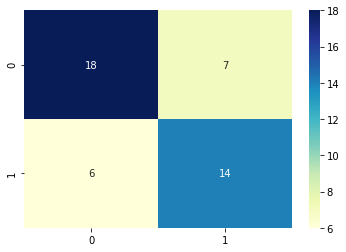

In [46]:
from sklearn.neighbors import KNeighborsClassifier

model = Model(KNeighborsClassifier(), 'KNN')
model.predict()

### Decision Tree Classifier

Accuracy Score: 0.6222222222222222
Mean Cross Validation Score: 0.6222222222222221

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.64      0.68        28
           1       0.50      0.59      0.54        17

    accuracy                           0.62        45
   macro avg       0.61      0.62      0.61        45
weighted avg       0.64      0.62      0.63        45



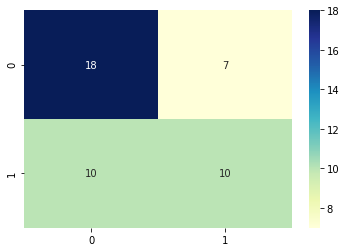

In [47]:
from sklearn.tree import DecisionTreeClassifier

model = Model(DecisionTreeClassifier(), 'Decision Tree')
model.predict()

#### Naive Bayesian

Accuracy Score: 0.7555555555555555
Mean Cross Validation Score: 0.6666666666666666

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.77      0.78        26
           1       0.70      0.74      0.72        19

    accuracy                           0.76        45
   macro avg       0.75      0.75      0.75        45
weighted avg       0.76      0.76      0.76        45



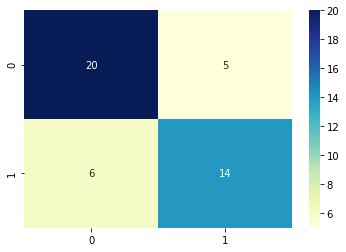

In [48]:
from sklearn.naive_bayes import GaussianNB

model = Model(GaussianNB(), 'Gaussian NB')
model.predict()

### Logistic Regression

Accuracy Score: 0.6888888888888889
Mean Cross Validation Score: 0.6888888888888889

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.72      0.72        25
           1       0.65      0.65      0.65        20

    accuracy                           0.69        45
   macro avg       0.69      0.69      0.69        45
weighted avg       0.69      0.69      0.69        45



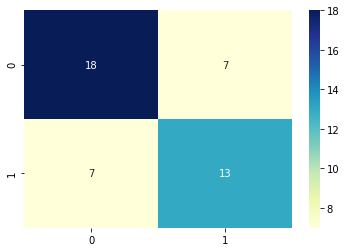

In [49]:
from sklearn.linear_model import LogisticRegression

model = Model(LogisticRegression(), 'Logistic Regression')
model.predict()

### Support Vector Machine

Accuracy Score: 0.7555555555555555
Mean Cross Validation Score: 0.6888888888888889

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.77      0.78        26
           1       0.70      0.74      0.72        19

    accuracy                           0.76        45
   macro avg       0.75      0.75      0.75        45
weighted avg       0.76      0.76      0.76        45



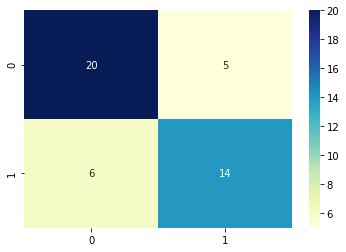

In [50]:
from sklearn.svm import SVC

model = Model(SVC(), 'SVC')
model.predict()

In [51]:
performance_df_scaled = pd.DataFrame(Model.scores)
performance_df_scaled.sort_values(by='Accuracy', ascending=False, inplace=True)
performance_df_scaled.reset_index(drop = True, inplace = True)

performance_df_scaled['Scaling'] = True

In [53]:
pd.concat([performance_df_scaled, performance_df_]).reset_index(drop = True)

,Model,Accuracy,CV_Score,Scaling
0,Gaussian NB,0.755556,0.666667,True
1,SVC,0.755556,0.688889,True
2,KNN,0.711111,0.622222,True
3,Logistic Regression,0.688889,0.688889,True
4,Decision Tree,0.622222,0.622222,True
5,Gaussian NB,0.755556,0.666667,False
6,Logistic Regression,0.711111,0.755556,False
7,SVC,0.644444,0.555556,False
8,Decision Tree,0.622222,0.511111,False
9,KNN,0.577778,0.622222,False
